In [1]:
import matplotlib.pyplot as plt #import plotting library
%matplotlib inline

In [2]:
from numpy.random import randint #import random number function
from numpy import sqrt #import square root function

In [3]:
side = 20 #number of sides on the die

In [4]:
num = 4 # number of samples

This code calculates the theoretical expectation value and uncertainty of dice rolls and simulates several sets of rolls and the experimental statistics.

## Theoretical Values
The theoretical expectation values are

$$ \langle v \rangle = \sum\limits_{j=\textrm{outcomes}} v_j P_j,$$

where $v_j$ are the possible outcome value and $P_j$ are the probabilities of those values occurring.

Similarly, the theoretical expectation value of $v^2$ is

$$ \langle v^2 \rangle = \sum\limits_{j=\textrm{outcomes}} v_j^2 P_j,$$

The theoretical uncertainty of a single measurement is defined by

$$ (\Delta v)^2 = \langle v^2 \rangle - \langle v \rangle^2. $$

In our case, if the number of sides on the die is _n_, the values are
$$j = 1, 2, ..., n. $$
$$v_j = j = 1, 2, ..., n. $$
$$ P_j = 1/n \text{ for all }j$$

## Experimental values
The experimental values are found using the usual statistical formulas for a set of $N$ measurements $v_k$. (Note that $v_k$ are not the possible values, but the actual die roll results.)

$$ \langle v \rangle \approx \frac{1}{N}\sum\limits_{k=1}^N v_k, $$
$$ \langle v^2 \rangle \approx \frac{1}{N}\sum\limits_{k=1}^N v_k^2, $$

The experimental variance is then given by
$$ (\Delta v)^2 = \langle v^2 \rangle - \langle v \rangle^2. $$
and the uncertainty is the square root of this:
$$ \Delta v = \sqrt{\langle v^2 \rangle - \langle v \rangle^2}. $$

We can also calculate the uncertainty of the mean of the measurements, also called the "mean standard error":

$$ \mathrm{m.s.e.} = \sqrt{\frac{(\Delta v)^2}{N-1}} = \frac{\Delta v}{\sqrt{N-1}}.$$

In [17]:
def makesamples(side, num):
    '''Generate num samples of rolling a die with side number of sides.
    Outputs experimental samples, expectation value, variance, and uncertainty.'''
    samples = randint(low=1, high=side+1, size=num)
    total = 0; totalsq = 0 # initialize variables to hold the sums
    for i in samples: 
        total = total + i/num # for calculating <v>
        totalsq = totalsq + i**2/num # for calculating <v**2>
    expectation_value = total
    variance = totalsq - total**2
    uncertainty = sqrt(variance)
    print(f"""
For {num:d} samples of a {side:d}-sided die, the data are {samples}. 
The experimental expectation value is {expectation_value:.3f}, 
the variance is {variance:.3f}, and the uncertainty is {uncertainty:.3f}.""")
    #calculate standard error (uncertainty of e.v.)
    error = uncertainty/sqrt(num)
    print("The standard error is {:.3f}.".format(error))
    return total, variance, uncertainty, error

In [18]:
ev4, var4, unc4, err4 = makesamples(side,num=4) # run the experiment 4 times


For 4 samples of a 20-sided die, the data are [11  3  3 10]. 
The experimental expectation value is 6.750, 
the variance is 14.188, and the uncertainty is 3.767.
The standard error is 1.883.


In [19]:
ev8, var8, unc8, err8 = makesamples(side, num=8) # run the experiment 8 times


For 8 samples of a 20-sided die, the data are [10 19 14  9 14 18  4  6]. 
The experimental expectation value is 11.750, 
the variance is 25.688, and the uncertainty is 5.068.
The standard error is 1.792.


In [20]:
ev16, var16, unc16, err16 = makesamples(side, num=16) # run the experiment 16 times


For 16 samples of a 20-sided die, the data are [15  7  2 20 16 10  7  2  4 17 15 12  4 12  2  3]. 
The experimental expectation value is 9.250, 
the variance is 35.312, and the uncertainty is 5.942.
The standard error is 1.486.


In [21]:
#Calculate the theoretical values
total = 0; totalsq = 0;
for i in range(1,side+1):
    total = total + i/side
    totalsq = totalsq + i*i/side
ThEv = total
ThVar = totalsq-total**2
ThUnc = sqrt(ThVar)
print(f"Theoretical expectation value = {ThEv:.3f}")
print(f"Theoretical variance = {ThVar:.3f}")
print(f"Theoretical uncertainty = {ThUnc:.3f}")

Theoretical expectation value = 10.500
Theoretical variance = 33.250
Theoretical uncertainty = 5.766


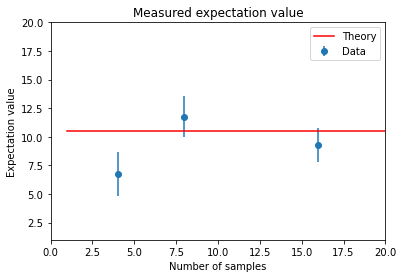

In [22]:
#plot estimated e.v. with standard error as a function of the number of samples,
#for the data generated above
#set up some arrays to hold the data
x = [4,8,16]
y = [ev4,ev8,ev16]
dy = [err4, err8, err16]
plt.errorbar(x,y,dy,ls='None',marker='o')
plt.plot([1,20],[ThEv, ThEv],'r')
# Make some labels:
plt.title("Measured expectation value")
plt.xlabel("Number of samples")
plt.ylabel("Expectation value")
plt.legend(('Theory','Data'))
plt.axis([0,20,1,side])
plt.show()